## Image Processing

<div class="alert alert-block alert-warning">
    <b>Learning outcomes:</b>
    <br>
    <ul>
        <li>Learn and apply basic image processing techniques</li>
        <li>Write image processing pipeline with OpenCV in Python</li>
    </ul>
</div>

This chapter provides an introduction to basic image processing techniques using the OpenCV computer vision library and some standard data analysis libraries in Python. Knowledge of image processing and Python programming is not required for this workshop, but will help.


### Load the Dependencies

This chapter requires the following libraries: **numpy**, **pandas**, **cv2**, **skimage**, **PIL**, **matplotlib**

In [3]:
import numpy as np
import pandas as pd
import cv2 as cv 
#from google.colab.patches import cv2_imshow # for image display
from PIL import Image 
import matplotlib.pylab as plt
from skimage import data
from skimage.feature import match_template
from skimage.draw import circle
from skimage import io
from skimage import color

### Load Image from urls

In this step we will read images from urls, and display them using openCV, please note the difference when reading image in RGB and BGR format. The default input color channels are in BGR format for openCV.

The following code allows us to show images in a jupyter notebook and here is a brief walk through of what each step does:

- `io.imread` 
    - read the picture as numerical array / matrixes
- `cv.cvtColor`
    - convert BGR into RGB
    - image when loaded by OpenCV is in BGR by default
- `cv.hconcat`
    - display images (BGR version and RGB version) and concatenate them horizontally
- `cv2_imshow` (for google colab). On local please use `matplotlib`
    - display images on our screen 

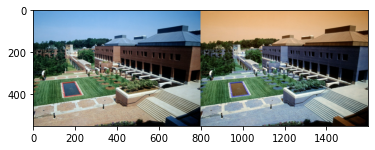

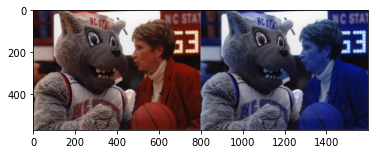

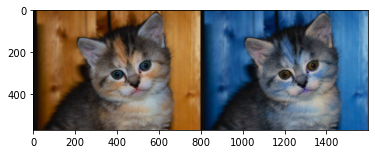

In [4]:
# Create a list to store the urls of the images
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
       "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
      "https://placekitten.com/800/571"]  
# Read and display the image
# loop over the image URLs, you could store several image urls in the list

for n, url in enumerate(urls):
  plt.figure()
  image = io.imread(url) 
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  final_frame = cv.hconcat((image, image_2))
  plt.imshow(final_frame)
  print('\n')
  plt.savefig(f'image_processing/img{n}.png')

![](./image_processing/img0.png)

![](./image_processing/img1.png)


![](./image_processing/img2.png)

In [34]:
# Using Colab

# Create a list to store the urls of the images
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
       "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
      "https://placekitten.com/800/571"]  
# Read and display the image
# loop over the image URLs, you could store several image urls in the list

for n, url in enumerate(urls):
  plt.figure()
  image = io.imread(url) 
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  final_frame = cv.hconcat((image, image_2))
  # cv2_imshow(final_frame) // uncomment for colab
  print('\n')
plt.show()


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

### Image analysis


Here we will analyse the image's contours and histograms. Firstly, let's take a look at some of the image's data

Notice that a RGB image is 3 dimension in nature? Let's make sense of its shape and what the numbers represent. 

(571, 800, 3)
uint8
571
800
3


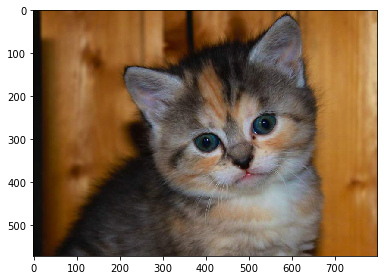

In [5]:
# Check the image matrix data type (could know the bit depth of the image)
io.imshow(image)
print(image.shape)
print(image.dtype)
# Check the height of image 
print(image.shape[0])
# Check the width of image 
print(image.shape[1])
# Check the number of channels of the image
print(image.shape[2])
plt.savefig(f'image_processing/img3.png')

![](./image_processing/img3.png)

### Image histogram



Sometimes you want to enhance the contrast in your image or expand the contrast in a particular region while sacrificing the detail in colors that don’t vary much, or don’t matter. A good tool to find interesting regions is the histogram. To create a histogram of our image data, we use the matplot.pylab `hist()` function.

Display the histogram of all the pixels in the color image

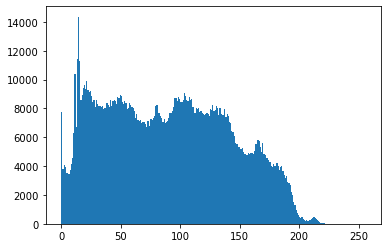

In [6]:
plt.hist(image.ravel(),bins = 256, range = [0,256]) 
plt.savefig(f'image_processing/img4.png')

![](./image_processing/img4.png)

Display the histogram of R, G, B channel
We could observe that the green channel has many pixels in 255, which represents the white patch in the image

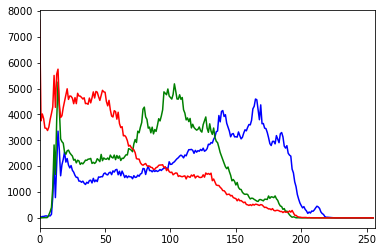

In [7]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.savefig(f'image_processing/img5.png')

![](./image_processing/img5.png)

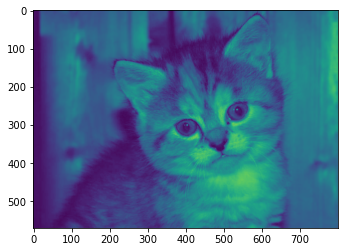

In [8]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(gray_image)
plt.savefig(f'image_processing/img6.png')

![](image_processing/img6.png)

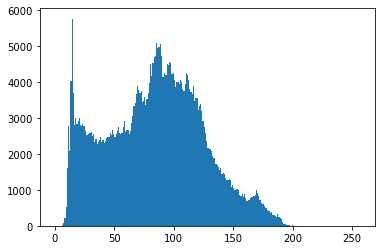

In [9]:
# Plot the histogram of the gray image. We could observe that the frequency of
# the image hist has decreased ~ 1/3 of the histogram of color image
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])
plt.savefig(f'image_processing/img7.png')

![](./image_processing/img7.png)

### Contour

Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.

Here is one method: Use the matplotlib contour. Refer to `https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contour.html` for more details.

Notice that that the edges of the cat is being highlighte here. `matplotlib` takes in the `numpy array` and is able to return you the contours based on the origin.

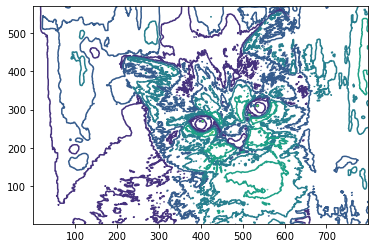

In [10]:
plt.contour(gray_image, origin = "image")
plt.savefig(f'image_processing/img8.png')

![](image_processing/img8.png)

Another way would be to use `opencv` for contour finding. In OpenCV, finding contours is like finding white object from black background. So remember, object to be found should be white and background should be black. 

See, there are three arguments in cv.findContours() function, first one is source image, second is contour retrieval mode, third is contour approximation method. And it outputs a modified image, the contours and hierarchy. contours is a Python list of all the contours in the image. Each individual contour is a Numpy array of (x,y) coordinates of boundary points of the object.


In [11]:

ret, thresh = cv.threshold(gray_image,150,255,0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
image = cv.drawContours(image, contours, -1, (0, 255, 0), 3)

result = Image.fromarray((image).astype(np.uint8))
result.save('image_processing/img9.png')

![](image_processing/img9.png)

### Grayscale transformation

The following section provides some examples of conducting mathematical transformations of the grayscale image. 

This is an inverse operation of the grayscale image, you could see that the bright pixels become dark, and the dark pixels become bright

In [12]:
im2 = - gray_image + 255
result = Image.fromarray((im2).astype(np.uint8))
result.save('image_processing/img10.png')

![](image_processing/img10.png)

Another transform of the image, after adding a constant, all the pixels become brighter and a hazing-like effect of the image is generated

- The lightness level of the gray_image decreases after this step

In [13]:
im3 = gray_image + 50
result = Image.fromarray((im3).astype(np.uint8))
result.save('image_processing/img11.png')

![](image_processing/img11.png)

### Histogram Equalization

This section demonstrates histogram equalization on a dark image. This transform flattens the gray-level histogram so that all intensities are as equally common as possible. The transform function is a cumulative distribution function (cdf) of the pixel values in the image (normalized to map the range of pixel values to the desired range). This example uses image 4 (im4).

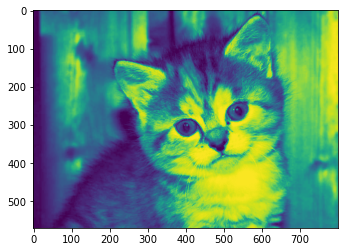

In [22]:
def histeq(im, nbr_bins = 256):
  """ Histogram equalization of a grayscale image.  """
  # get the image histogram
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = imhist.max()*cdf/cdf.max()  #normalize
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]

# apply the function on your dark image to increase the contrast
# we could observe that the contrast of the black background has increased
im5 = histeq(im3)
plt.imshow(im5)
plt.show()

![](image_processing/img_ss2.png)

### Fourier Transformation 

A fourier transform is used to find the frequency domian of an image. You can consider an image as a signal which is sampled in two directions. So taking a fourier transform in both X and Y directions gives you the frequency representation of image. For the sinusoidal signal, if the amplitude varies so fast in short time, you can say it is a high frequency signal. If it varies slowly, it is a low frequency signal. Edges and noises are high frequency contents in an image because they change drastically in images.

- Blur the grayscale image by a Guassian filter with kernel size of 10
    - `imBlur = cv.blur(gray_image,(5,5))`
- Transform the image to frequency domain
    - `f = np.fft.fft2(imBlur)`
- Bring the zero-frequency component to the center
    - `fshift = np.fft.fftshift(f)`
    - `magnitude_spectrum = 30*np.log(np.abs(fshift))`

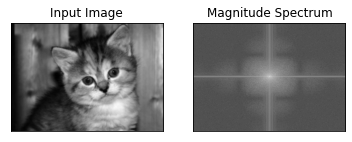

In [23]:
imBlur = cv.blur(gray_image,(5,5))
f = np.fft.fft2(imBlur)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

![](image_processing/img_ss3.png)

### Highpass Filtering in FFT


This section demonstrates conducting a high pass filter to remove the low frequency component, resulting in a sharpened image which contains the edges. Such technique allow us to find edges in the image.


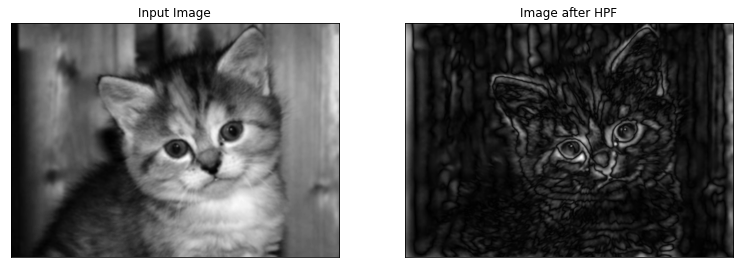

In [24]:
rows, cols = imBlur.shape
crow,ccol = round(rows/2) , round(cols/2)
# remove low frequencies with a rectangle size of 10
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=([20, 20]))
plt.subplot(131),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.show()



![](image_processing/img_ss.png)

### Pattern Recognition

In the following section, we are going to go through pattern matching. Notice the below is a car plate number from this url: `https://www.hdm-stuttgart.de/~maucher/Python/ComputerVision/html/_images/template.png`. A copy of the iamge is available in dropbox as well. We would try to find individual alphabets. A common use case that is already widely implemented would be car plate number tracking.

ipykernel_launcher:5: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.


Text(0.5, 1.0, 'Search pattern in this image')

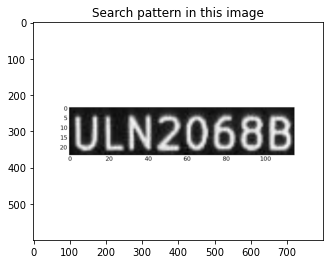

In [25]:
from skimage import color
from skimage import io


full = color.rgb2gray(io.imread('./image_processing/platine.jpg'))
plt.imshow(full,cmap = plt.cm.gray)
plt.title("Search pattern in this image")

![](image_processing/platine.jpg)

The follwing code crops out a portion of the image: `template = full[240:370,190:250]`. The numbers corresponds to the width and height of the iamge. We are plotting the segment out. Here is what it looks like:

Text(0.5, 1.0, 'Search pattern in this image')

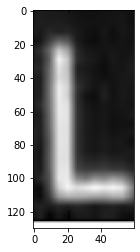

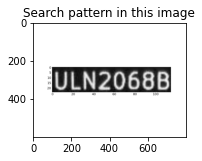

In [28]:
template = full[240:370,190:250]
plt.imshow(template,cmap = plt.cm.gray)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(full,cmap = plt.cm.gray)
plt.title("Search pattern in this image")

![](./image_processing/segment.png)

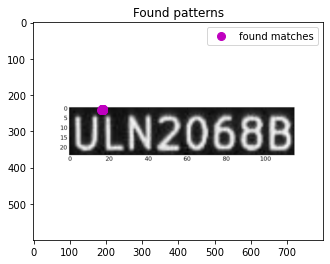

In [31]:
correlation=match_template(full,template)

xcoords=[]
ycoords=[]
for row in range(correlation.shape[0]):
        for col in range(correlation.shape[1]):
                if correlation[row,col]>0.9:
                        #print(row,col,correlation[row,col])
                        xcoords.append(col)
                        ycoords.append(row)

plt.imshow(full,cmap = plt.cm.gray)
plt.title("Found patterns")
plt.plot(xcoords,ycoords,'om',ms=8,label="found matches")
plt.legend(loc=2,numpoints=1)
plt.legend()
plt.show()

![](image_processing/found.png)

Notice that there is a mark at the top left hand corner of `L` in the image. This is because the `L` is being moved across the entire image and when there is a match it will be captured. You can try to change the shape and size of `L`, by rotating and resizing. The result might be different depending on the correlation between the template and the original image.

### Sample code

In [ ]:
from skimage import io

image = io.imread("C:/Users/User/Dropbox/TT Library/AI Model/Image & CNN/Pug.jpg") 

io.imshow(image)
image.shape

In [ ]:
import matplotlib.pylab as plt
plt.hist(image.flatten())

In [ ]:
from skimage import color

imageGray = color.rgb2gray(image)
io.imshow(imageGray)

In [ ]:
plt.contour(imageGray, origin = "image") #origin = "image", else inverted

In [ ]:
from skimage.transform import rescale

image_rescaled = rescale(imageGray, 0.25)
io.imshow(image_rescaled)

In [ ]:
from skimage import filters
edges = filters.sobel(imageGray)
io.imshow(edges)
io.show()

In [ ]:
import numpy as np

f = np.fft.fft2(imageGray)
# Bring the zero-frequency component to the center
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(np.abs(fshift))

plt.imshow(imageGray, cmap = "gray")


In [ ]:
plt.imshow(magnitude_spectrum)
plt.show()

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

from skimage import io
io.imshow(x_train[0])

print(y_train[0])

print(x_train.shape)
print(x_train[0][0])
x_train = x_train.reshape(60000,28,28,1)
print("after", x_train[0][0])
x_test = x_test.reshape(10000,28,28,1)

In [ ]:
print(y_train)
y_train = keras.utils.to_categorical(y_train, 10)
print("after", y_train[0])
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(10))
model.summary()

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=5000, epochs=1)
score = model.evaluate(x_train, y_train)
print(score)
score = model.evaluate(x_test, y_test)
print(score)